In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224

data_dir = 'Spine/'

X = []
y = []

# Load data
for folder in os.scandir(data_dir):
    print(folder)
   
    
    for entry in os.scandir(data_dir + folder.name):
        img = cv2.imread(data_dir + folder.name + '/' + entry.name, cv2.IMREAD_COLOR)  # Read image using OpenCV
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = np.array(img, dtype='float32')
        img = img / 255
        X.append(img)
        if folder.name == 'normal':
            y.append(0)
        elif folder.name == 'osteophenia':
            y.append(1)
        else:
            y.append(2)
X = np.array(X)
y = np.array(y)




D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<DirEntry 'normal'>
<DirEntry 'osteophenia'>
<DirEntry 'osteoporosis'>


In [2]:

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)

predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

opt = Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=123)

# Train the model with checkpoint callback
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32, shuffle=True)


87910968/87910968 [==============================] - 68s 1us/step
Epoch 1/30
5/5 [==============================] - 10s 1s/step - loss: 1.3222 - accuracy: 0.3237 - val_loss: 1.1186 - val_accuracy: 0.4286
Epoch 2/30
5/5 [==============================] - 5s 1s/step - loss: 1.3534 - accuracy: 0.3309 - val_loss: 1.1144 - val_accuracy: 0.3714
Epoch 3/30
5/5 [==============================] - 5s 1s/step - loss: 1.0721 - accuracy: 0.5180 - val_loss: 1.0973 - val_accuracy: 0.4571
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 1.1970 - accuracy: 0.3525 - val_loss: 1.0840 - val_accuracy: 0.4286
Epoch 5/30
5/5 [==============================] - 5s 1s/step - loss: 1.1569 - accuracy: 0.3885 - val_loss: 1.0831 - val_accuracy: 0.5143
Epoch 6/30
5/5 [==============================] - 5s 1s/step - loss: 1.1610 - accuracy: 0.4173 - val_loss: 1.0911 - val_accuracy: 0.4571
Epoch 7/30
5/5 [==============================] - 5s 1s/step - loss: 1.0586 - accuracy: 0.4317 - val_loss: 1.08

In [3]:


history1= model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32, shuffle=True)



Epoch 1/30
5/5 [==============================] - 6s 1s/step - loss: 0.6982 - accuracy: 0.6906 - val_loss: 1.1351 - val_accuracy: 0.4857
Epoch 2/30
5/5 [==============================] - 5s 1s/step - loss: 0.7780 - accuracy: 0.6763 - val_loss: 1.1485 - val_accuracy: 0.4571
Epoch 3/30
5/5 [==============================] - 5s 1s/step - loss: 0.7535 - accuracy: 0.6547 - val_loss: 1.1865 - val_accuracy: 0.4571
Epoch 4/30
5/5 [==============================] - 5s 1s/step - loss: 0.6998 - accuracy: 0.6619 - val_loss: 1.1678 - val_accuracy: 0.4286
Epoch 5/30
5/5 [==============================] - 5s 1s/step - loss: 0.6703 - accuracy: 0.7266 - val_loss: 1.1646 - val_accuracy: 0.4571
Epoch 6/30
5/5 [==============================] - 5s 1s/step - loss: 0.7185 - accuracy: 0.6835 - val_loss: 1.1688 - val_accuracy: 0.4286
Epoch 7/30
5/5 [==============================] - 5s 1s/step - loss: 0.6722 - accuracy: 0.6906 - val_loss: 1.1610 - val_accuracy: 0.4857
Epoch 8/30
5/5 [=========================

In [4]:

history2 = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, shuffle=True)


Epoch 1/20
5/5 [==============================] - 6s 1s/step - loss: 0.4092 - accuracy: 0.8417 - val_loss: 1.3738 - val_accuracy: 0.4286
Epoch 2/20
5/5 [==============================] - 5s 1s/step - loss: 0.3442 - accuracy: 0.8489 - val_loss: 1.4512 - val_accuracy: 0.5714
Epoch 3/20
5/5 [==============================] - 5s 1s/step - loss: 0.3226 - accuracy: 0.8993 - val_loss: 1.3594 - val_accuracy: 0.5143
Epoch 4/20
5/5 [==============================] - 5s 1s/step - loss: 0.3117 - accuracy: 0.8849 - val_loss: 1.3767 - val_accuracy: 0.4286
Epoch 5/20
5/5 [==============================] - 5s 1s/step - loss: 0.2270 - accuracy: 0.9424 - val_loss: 1.4213 - val_accuracy: 0.5143
Epoch 6/20
5/5 [==============================] - 5s 1s/step - loss: 0.2384 - accuracy: 0.9353 - val_loss: 1.4344 - val_accuracy: 0.5143
Epoch 7/20
5/5 [==============================] - 5s 1s/step - loss: 0.2813 - accuracy: 0.9065 - val_loss: 1.3986 - val_accuracy: 0.5429
Epoch 8/20
5/5 [=========================

In [5]:

history3 = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32, shuffle=True)


Epoch 1/5
5/5 [==============================] - 5s 1s/step - loss: 0.1409 - accuracy: 0.9712 - val_loss: 1.5341 - val_accuracy: 0.5143
Epoch 2/5
5/5 [==============================] - 5s 1s/step - loss: 0.1208 - accuracy: 0.9784 - val_loss: 1.5016 - val_accuracy: 0.5714
Epoch 3/5
5/5 [==============================] - 5s 1s/step - loss: 0.1439 - accuracy: 0.9784 - val_loss: 1.5349 - val_accuracy: 0.5429
Epoch 4/5
5/5 [==============================] - 5s 1s/step - loss: 0.1059 - accuracy: 0.9856 - val_loss: 1.5937 - val_accuracy: 0.4857
Epoch 5/5
5/5 [==============================] - 5s 1s/step - loss: 0.1289 - accuracy: 0.9568 - val_loss: 1.5418 - val_accuracy: 0.5714


In [6]:

test_loss, test_accuracy = model.evaluate(X_val, y_val)
print("Test Accuracy:", test_accuracy)


2/2 [==============================] - 1s 162ms/step - loss: 1.5418 - accuracy: 0.5714
Test Accuracy: 0.5714285969734192


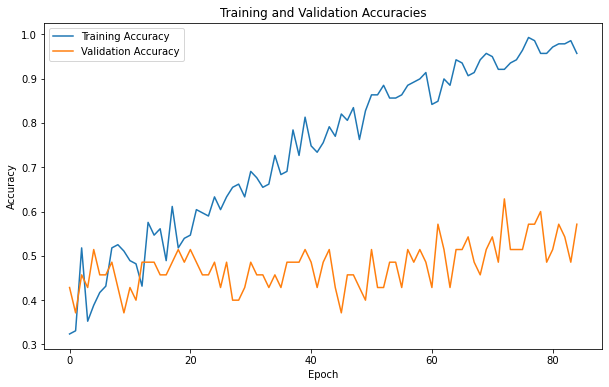

In [7]:

import matplotlib.pyplot as plt

# Combine histories
combined_history = {}
for i, history in enumerate([history, history1, history2, history3]):
    for key in history.history:
        if key not in combined_history:
            combined_history[key] = []
        combined_history[key].extend(history.history[key])

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [8]:

model.save('spine_InceptionV3_without_aug.h5')


D:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
